In [1]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# In order to make the import of local modules
import sys
sys.path.append('..')

# local modules
from ml.linear_regression import *

In [2]:
def regression_and_display(xs, ys, predictor):
    if not xs or len(xs) != len(ys):
        return
    
    x_min = min(x[0] for x in xs)
    x_max = max(x[0] for x in xs)
    fit_xs = np.linspace(x_min, x_max, 100)
    predictor.fit(xs, ys)
    print(predictor.parameters)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.scatter(xs, ys)
    ax.plot(fit_xs, predictor.transform(np.expand_dims(fit_xs, axis=1)))
    plt.show()

{'slope': 0.6000000000000004, 'intercept': 1.7999999999999967}


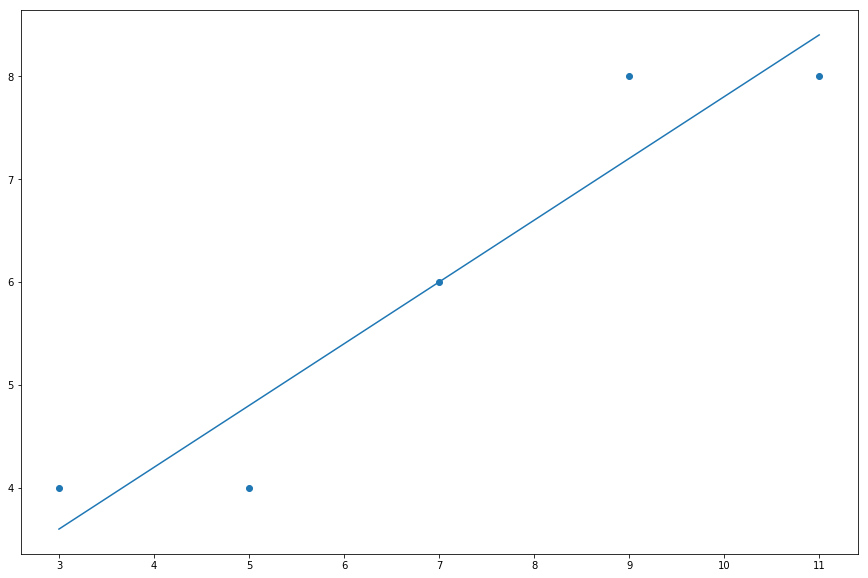

In [3]:
# Non singular matrix are solved correctly
regression_and_display(xs=[(3,), (5,), (7,), (9,), (11,)],
                       ys=[4, 4, 6, 8, 8],
                       predictor=LinearRegression(linear_regression))

{'slope': 0.6000012, 'intercept': 1.7999907}


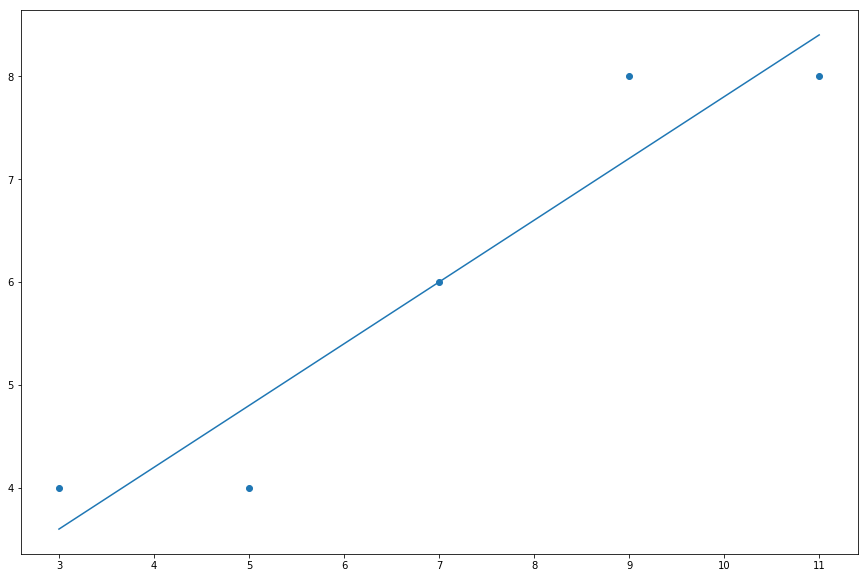

In [4]:
# Now with deep learning
regression_and_display(xs=[(3,), (5,), (7,), (9,), (11,)],
                       ys=[4, 4, 6, 8, 8],
                       predictor=LinearRegression(linear_regression_dl))

{'weights': array([-4.95833333,  0.875     , -0.04166667]), 'intercept': 12.125000000011633}


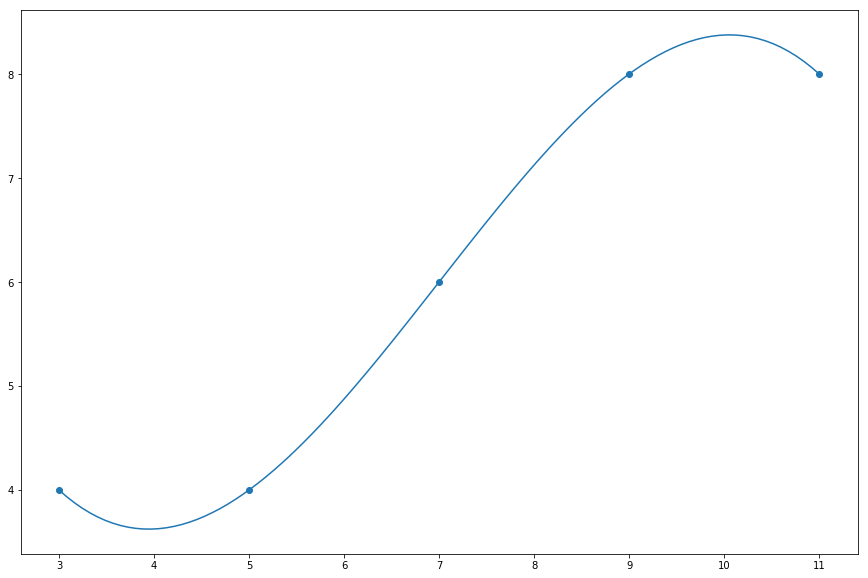

In [5]:
# TODO - play with regression of higher degree polynomials (or even sin, cos acting as bases of the vectorial space)
   
def to_cubic(xs):
    def x_to_cubic(x):
        output = []
        for i in range(len(x)):
            output.append(x[i])
        for i in range(len(x)):
            for j in range(i, len(x)):
                output.append(x[i] * x[j])
        for i in range(len(x)):
            for j in range(i, len(x)):
                for k in range(j, len(x)):
                    output.append(x[i] * x[j] * x[k])
        return np.array(output)
    return np.stack(x_to_cubic(x) for x in xs)

regression_and_display(xs=[(3,), (5,), (7,), (9,), (11,)],
                       ys=[4, 4, 6, 8, 8],
                       predictor=MappedRegression(regression_method=linear_regression,
                                                  transformation=to_cubic))


{'weights': array([ 2.37527056, -0.20319264,  0.00568182]), 'intercept': -2.177759740261019}


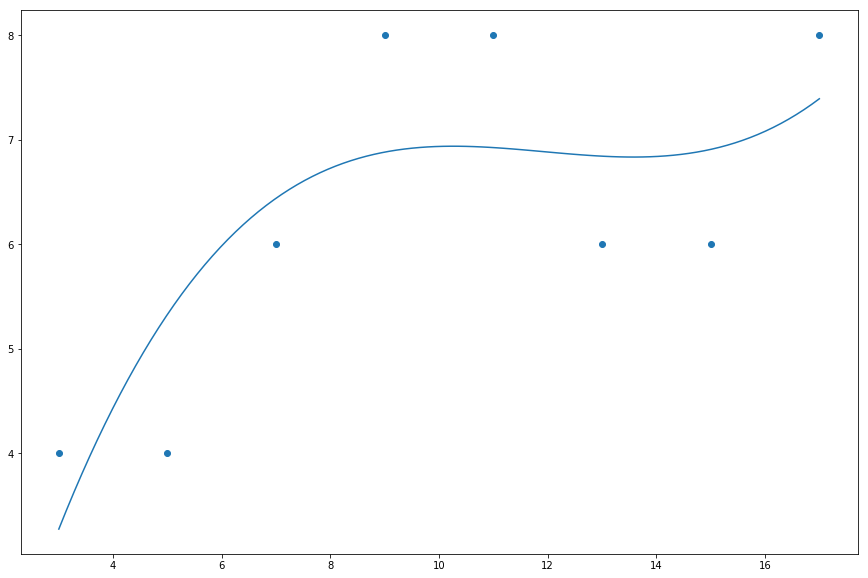

In [11]:
# TODO - solve some interesting problems like the roller coaster
# Does it even apply: we want to solve an interpolation problem... and with constraints on derivatives
# But you can do it with a nice curve given the points

regression_and_display(xs=[(3,), (5,), (7,), (9,), (11,), (13,), (15,), (17,)],
                       ys=[4, 4, 6, 8, 8, 6, 6, 8],
                       predictor=MappedRegression(regression_method=linear_regression,
                                                  transformation=to_cubic))

{}


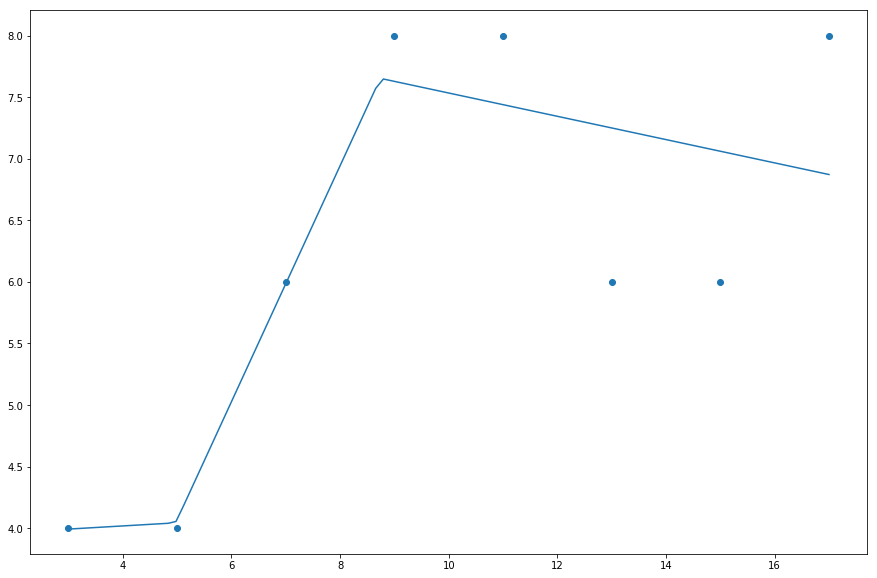

In [17]:
# Same with DL (does not work great...)

def multi_layer_regression_dl(xs, ys):
    feature_size = len(xs[0])
    model = nn.Sequential(nn.Linear(feature_size, 40),
                          nn.ReLU(),
                          nn.Linear(40, 1))
    return regression_dl(xs, ys, model=model)

regression_and_display(xs=[(3,), (5,), (7,), (9,), (11,), (13,), (15,), (17,)],
                       ys=[4, 4, 6, 8, 8, 6, 6, 8],
                       predictor=MultiLayerRegressionDL(multi_layer_regression_dl))

In [14]:
"""
When does it fail? When the matrix X^T * X is singular.
Som e
"""

# Singular matrix (because it does not use the second dimension)
ws = linear_regression(xs=[(3,1), (5,1), (7,1), (9,1), (11,1)], ys=[4, 4, 6, 8, 8])
print(ws)

# Indeed, here is the product of the matrices X^t and X
X = np.array([
    [3, 1, 1],
    [5, 1, 1],
    [7, 1, 1],
    [9, 1, 1],
    [11, 1, 1]
])
print(np.matmul(np.transpose(X), X))

# But this is rather stupid, we could solve it by hand by making sure to just cut a plan where y = 1 always?
# - the problem is that the algorithm tries to find the intercept
# - but to find the intercept, you need the slope of Y
# - of course we could put it at 0 manually, but the algorithm does not see that

# Just add some noise and you can solve the original matrix
ws = linear_regression(xs=[(3,1.0001), (5,1), (7,1), (9,1), (11,1)], ys=[4, 4, 6, 8, 8])
print(ws)

# Or here is an example in which we just rotate slightly the plan and it works...
ws = linear_regression(xs=[(3,1), (5,2), (7,3), (9,4), (11,5)], ys=[4, 4, 6, 8, 8])
print(ws)

X = np.array([
    [3, 1, 1],
    [5, 2, 1],
    [7, 3, 1],
    [9, 4, 1],
    [11, 5, 1]
])
print(np.matmul(np.transpose(X), X))

Singular matrix
None
[[285  35  35]
 [ 35   5   5]
 [ 35   5   5]]
[ 6.99999987e-01  9.99833962e+03 -9.99743962e+03]
[0.290625 0.61875  2.109375]
[[285 125  35]
 [125  55  15]
 [ 35  15   5]]


In [ ]:
# TODO - we can solve the above issue with an algorithm that removes the axies that are not used.